In [1]:
import math
import pandas as pd
import numpy as np
from hurst import compute_Hc, random_walk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("^GSPC2.csv", parse_dates=['Date'])["Open"]

In [3]:
data.describe()

count     251.000000
mean     2993.371878
std       157.718632
min      2730.790039
25%      2882.050049
50%      2965.520020
75%      3088.344971
max      3378.080078
Name: Open, dtype: float64

<Axes: >

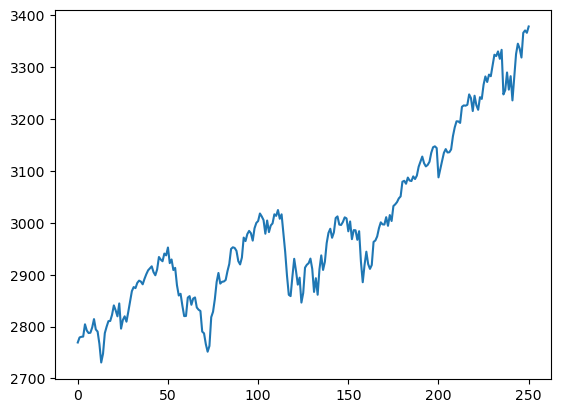

In [4]:
data.plot()

In [5]:
def hurst(ts,a=math.pi/2):
    log_data=np.log(ts/ts.shift(1))[1:]
    n=len(log_data)
    x_mean=log_data.mean()
    s=math.sqrt(sum((log_data-x_mean)**2)/n)
    zu=np.cumsum(log_data)
    r=np.max(zu)-np.min(zu)
    r_s=r/s
    h=np.log(r_s)/(np.log(a)+np.log(n))
    return h

In [6]:
h=hurst(data)
print(h)

0.5722852899366596


In [7]:
c=math.pow(2,2*h-1)-1
print(c)

0.10540158007545553
